# Exercise 4

In this exercise you will use the dataset in EFIplus_medit.zip to:
1. Using an appropriate visualization, check the effect of Mean Annual Temperature (Temp_ann) on the
presence of Salmo trutta fario (Brown Trout).

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm


In [3]:
file_path = 'EFIplus_medit.zip'  # Path to the zip file
df = pd.read_csv('EFIplus_medit.zip',compression='zip', sep=";")

pd.set_option('display.max_columns', None)
print(df.head())

    Site_code   Latitude  Longitude Country Catchment_name  Galiza  Subsample  \
0  ES_01_0002  38.102003  -4.096070   Spain   Guadalquivir       0          1   
1  ES_02_0001  40.530188  -1.887796   Spain           Tejo       0          1   
2  ES_02_0002  40.595432  -1.928079   Spain           Tejo       0          1   
3  ES_02_0003  40.656184  -1.989831   Spain           Tejo       0          1   
4  ES_02_0004  40.676402  -2.036274   Spain           Tejo       0          1   

   Calib_EFI_Medit  Calib_connect  Calib_hydrol  Calib_morphol  Calib_wqual  \
0                0              1             0              1            1   
1                1              1             1              1            1   
2                1              1             1              1            1   
3                1              1             1              1            1   
4                1              1             1              1            1   

   Geomorph1  Geomorph2  Geomorph3 Wat

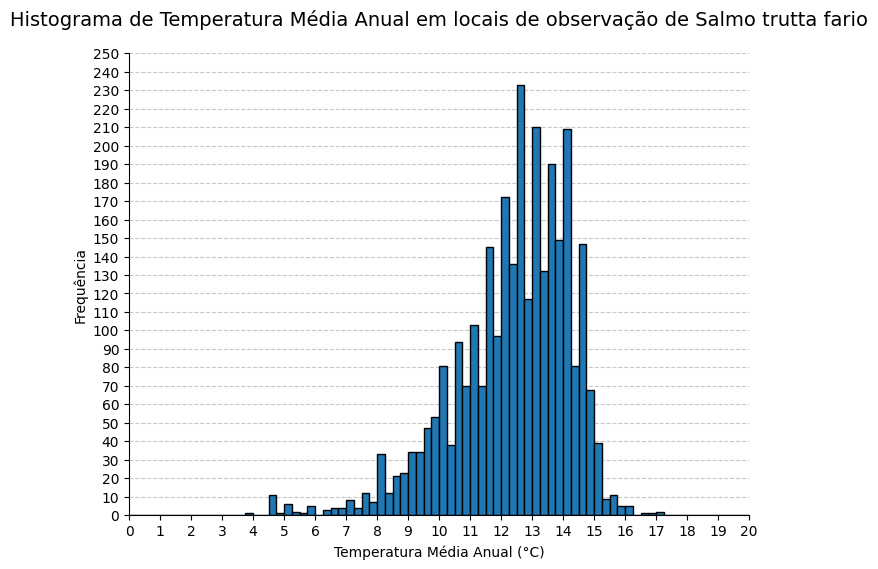

In [6]:
df_filtered = df[(df[r'Salmo trutta fario'] == 1)]

# Criar o histograma com step de 0.25
plt.figure(figsize=(8, 6))
plt.hist(df_filtered['temp_ann'], bins=[x * 0.25 for x in range(0, 81)], 
         edgecolor='black', alpha=1, zorder=2)  # Barras sem cor, só contorno

plt.xlabel("Temperatura Média Anual (°C)")
plt.ylabel("Frequência")

# Ajustar os limites dos eixos
plt.xlim(0, 20)
plt.ylim(0, 250)

# Configurar os ticks dos eixos
plt.xticks(range(0, 21, 1))  # Eixo X de 1 em 1
plt.yticks(range(0, 251, 10))  # Eixo Y de 10 em 10

# Adicionar gridlines atrás das barras
plt.grid(axis='y', linestyle='--', alpha=0.7, zorder=0)  # Zorder 0 para ficar atrás

# Remover bordas superior e direita
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Ajustar a interseção dos eixos
ax.spines['left'].set_position(('data', 0))
ax.spines['bottom'].set_position(('data', 0))

# Ajustar o título maior e com mais espaço
plt.title("Histograma de Temperatura Média Anual em locais de observação de Salmo trutta fario", 
          fontsize=14, pad=20)

plt.show()

O Salmo trutta faio perfere estabelecer-se em locais com temperaturas médias anuais de 11°C a 15°C.

2. Check the same effect but now separately for Minho and in the Tagus catchments and comparing the
“effect sizes”.

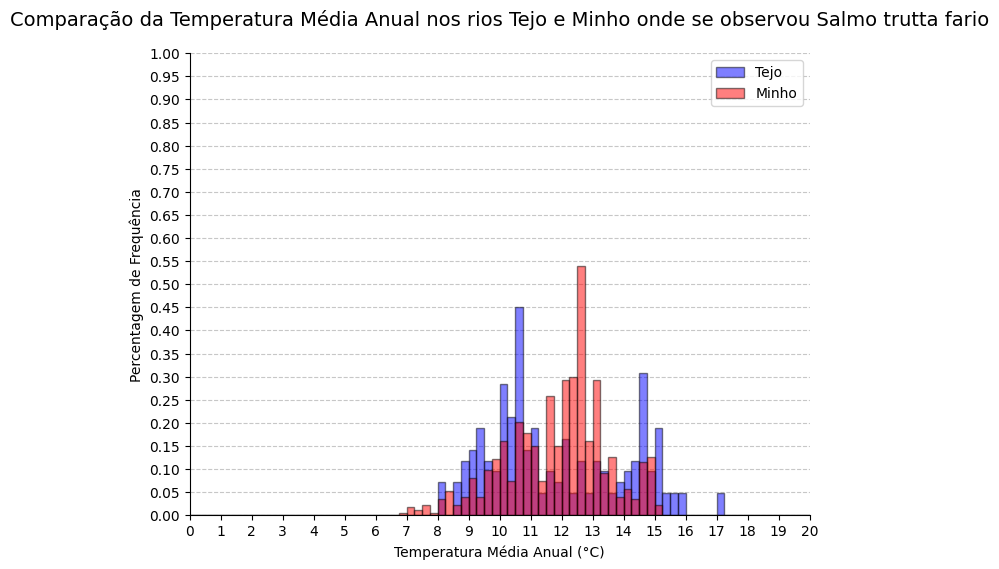

In [19]:
# Filtrar os dados para Catchment_name == 'Tejo' e 'Minho' e Salmo trutta fario == 1
df_tejo = df[(df[r'Salmo trutta fario'] == 1) & (df['Catchment_name'] == 'Tejo')]
df_minho = df[(df[r'Salmo trutta fario'] == 1) & (df['Catchment_name'] == 'Minho')]

# Criar o histograma para os dois catchments com estilo de barras default
plt.figure(figsize=(8, 6))

# Histograma para Tejo (azul com transparência), normalizado para percentagem
n_tejo, bins_tejo, _ = plt.hist(df_tejo['temp_ann'], bins=[x * 0.25 for x in range(0, 81)], 
                                 edgecolor='black', color='blue', alpha=0.5, label='Tejo', density=True, zorder=2)

# Histograma para Minho (vermelho com transparência), normalizado para percentagem
n_minho, bins_minho, _ = plt.hist(df_minho['temp_ann'], bins=[x * 0.25 for x in range(0, 81)], 
                                  edgecolor='black', color='red', alpha=0.5, label='Minho', density=True, zorder=2)

# Adicionar legendas
plt.xlabel("Temperatura Média Anual (°C)")
plt.ylabel("Percentagem de Frequência")

# Ajustar os limites dos eixos
plt.xlim(0, 20)
plt.ylim(0, 1)  # Limite do eixo Y de 0 a 1

# Configurar os ticks dos eixos
plt.xticks(range(0, 21, 1))  # Eixo X de 1 em 1
plt.yticks([x * 0.05 for x in range(0, 21)])  # Eixo Y de 0 a 1, com passos de 0.05

# Adicionar gridlines atrás das barras
plt.grid(axis='y', linestyle='--', alpha=0.7, zorder=0)  # Zorder 0 para ficar atrás

# Remover bordas superior e direita
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Ajustar a interseção dos eixos
ax.spines['left'].set_position(('data', 0))
ax.spines['bottom'].set_position(('data', 0))

# Ajustar o título maior e com mais espaço
plt.title("Comparação da Temperatura Média Anual nos rios Tejo e Minho onde se observou Salmo trutta fario", 
          fontsize=14, pad=20)

# Adicionar legenda
plt.legend()

# Mostrar o gráfico
plt.show()

O Salmo trutta faio no Rio Tejo perfere estabelecer-se em locais com temperaturas médias anuais de 11°C a 13°C enquanto que no Rio Minho perfere temperaturas médias anuais de 10°C a 11°C ou 14°C a 15°C.

3. Test, using both visualization and hypothesis testing methods, if the actual_river_slope is drawn from a normal distribution.

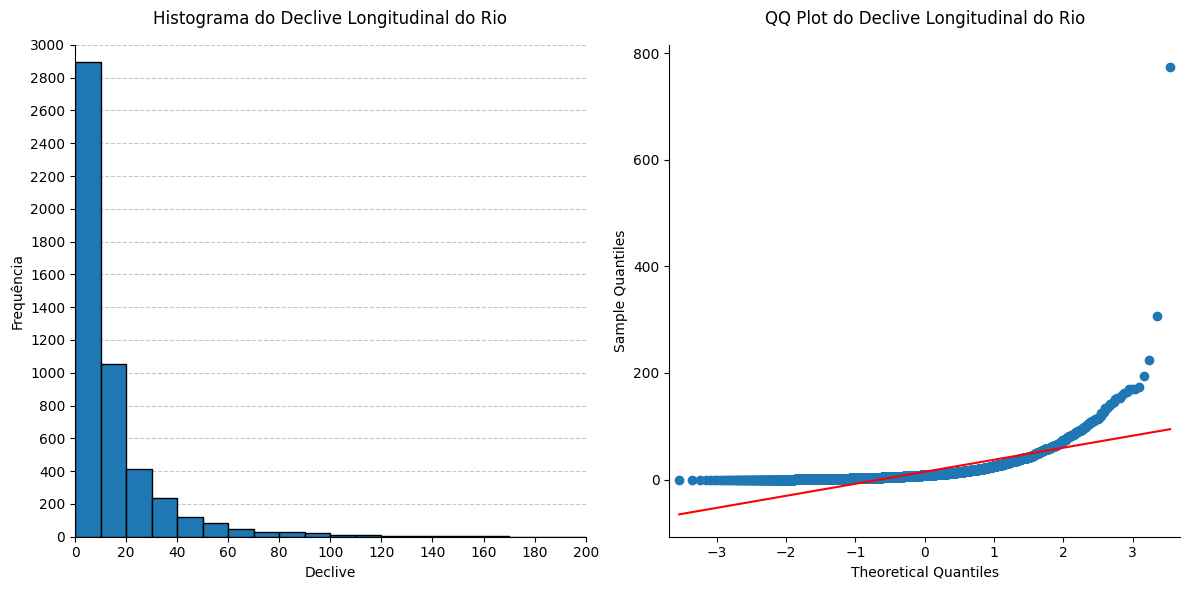

In [ ]:
# Criar um novo DataFrame contendo apenas os registros com valores não nulos em 'Actual_river_slope'
df_filtered = df.dropna(subset=['Actual_river_slope'])

# Extrair os valores da coluna para análise
data = df_filtered['Actual_river_slope']

# Criar a figura com dois subgráficos lado a lado
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# ---- Histograma ----
max_value = int(data.max())  # Pega o maior valor dos dados
axes[0].hist(data, bins=[x * 10 for x in range(0, 81)], edgecolor='black', alpha=1, zorder=2)

axes[0].set_xlabel("Declive")
axes[0].set_ylabel("Frequência")

# Ajustar os limites dos eixos
axes[0].set_xlim(0, 200)
axes[0].set_ylim(0, 3000)

# Configurar os ticks dos eixos
axes[0].set_xticks(range(0, 201, 20))  # Eixo X de 2 em 2
axes[0].set_yticks(range(0, 3001, 200))  # Eixo Y de 10 em 10

# Adicionar gridlines atrás das barras
axes[0].grid(axis='y', linestyle='--', alpha=0.7, zorder=0)  # Zorder 0 para ficar atrás

# Remover bordas superior e direita
axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)

# Ajustar a interseção dos eixos
axes[0].spines['left'].set_position(('data', 0))
axes[0].spines['bottom'].set_position(('data', 0))

# Título do histograma
axes[0].set_title("Histograma do Declive Longitudinal do Rio", fontsize=12, pad=15)


# ---- QQ Plot ----
sm.qqplot(data, line='s', ax=axes[1])  # Gerar o QQ plot no segundo eixo
axes[1].set_title("QQ Plot do Declive Longitudinal do Rio", fontsize=12, pad=15)

# Remover as bordas superior e direita
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)

# Mostrar o gráfico
plt.tight_layout()
plt.show()

In [69]:
# 2. Testes de normalidade

# Anderson-Darling Test
anderson_result = stats.anderson(data, dist='norm')

# D’Agostino’s K² Test
dagostino_stat, dagostino_p = stats.normaltest(data)

# Shapiro-Wilk Test
shapiro_stat, shapiro_p = stats.shapiro(data)

# Kolmogorov-Smirnov Test
ks_stat, ks_p = stats.kstest(data, 'norm', args=(np.mean(data), np.std(data, ddof=1)))

# Exibir resultados
print("### Normality Tests ###")
print(f"Anderson-Darling Test: \n -Statistic = {anderson_result.statistic} \n -Critical Values = {anderson_result.critical_values} \n -Level of Significance = {anderson_result.significance_level}")
print(f"D’Agostino’s K² Test: Statistic = {dagostino_stat:.4f}, p-value = {dagostino_p:.4f}")
print(f"Shapiro-Wilk Test: Statistic = {shapiro_stat:.4f}, p-value = {shapiro_p:.4f}")
print(f"Kolmogorov-Smirnov Test: Statistic = {ks_stat:.4f}, p-value = {ks_p:.4f}")



# Interpretando os p-valores: Se p < 0.05, rejeitamos a hipótese nula de normalidade
alpha = 0.05
print("\n### Interpretation ###")

print("Anderson-Darling:")
p = 0
for i in range(len(anderson_result.critical_values)):
    slevel, cvalues = anderson_result.significance_level[i], anderson_result.critical_values[i]
    if anderson_result.statistic < anderson_result.critical_values[i]:
        print(' -%.0f: %.3f, Normal' % (slevel, cvalues))
    else:
        print(' -%.0f: %.3f, Not Normal' % (slevel, cvalues))

print("D’Agostino’s K²: Normal" if dagostino_p > alpha else "D’Agostino’s K²: Not Normal")
print("Shapiro-Wilk: Normal" if shapiro_p > alpha else "Shapiro-Wilk: Not Normal")
print("Kolmogorov-Smirnov: Normal" if ks_p > alpha else "Kolmogorov-Smirnov: Not Normal")


### Normality Tests ###
Anderson-Darling Test: 
 -Statistic = 541.4514465468019 
 -Critical Values = [0.576 0.655 0.786 0.917 1.091] 
 -Level of Significance = [15.  10.   5.   2.5  1. ]
D’Agostino’s K² Test: Statistic = 8128.0377, p-value = 0.0000
Shapiro-Wilk Test: Statistic = 0.5163, p-value = 0.0000
Kolmogorov-Smirnov Test: Statistic = 0.2593, p-value = 0.0000

### Interpretation ###
Anderson-Darling:
 -15: 0.576, Not Normal
 -10: 0.655, Not Normal
 -5: 0.786, Not Normal
 -2: 0.917, Not Normal
 -1: 1.091, Not Normal
D’Agostino’s K²: Not Normal
Shapiro-Wilk: Not Normal
Kolmogorov-Smirnov: Not Normal


All the tests corroborate the analysis of the graph, which shows that the values of the longitudinal slope of the river do not follow a normal distribution.

This can be seen from the graph when we see that the quartile points of the distribution do not follow the theoretical quartiles of a reduced normal distribution on the dashed line.

We can also say that this distribution is right-skewed which can be verified through the histogram.

4. Take 100 samples of 2000 observations with replacement, compute the mean for each sample and plot
the resulting histogram of means. Test if these 100 mean values are drawn from a normal distribution.

In [91]:
# Número de amostras e tamanho de cada amostra
num_samples = 100
sample_size = 2000

# Lista para armazenar as médias amostrais
means = []

# Gerar 100 amostras bootstrap usando um loop
for i in range(num_samples):
    sample = np.random.choice(data, size=sample_size, replace=True)  # Sorteio com reposição
    sample_mean = np.mean(sample)  # Calcular a média da amostra
    means.append(sample_mean)  # Armazenar o valor

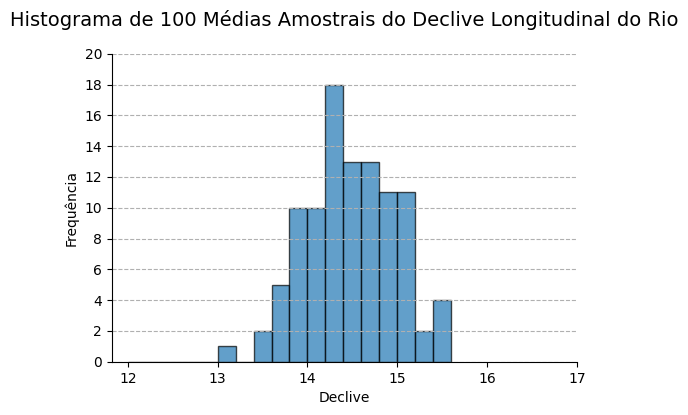

In [92]:
# Criar o histograma
plt.figure(figsize=(6, 4))
plt.hist(means, bins=np.arange(12, max(means) + 0.2, 0.2), edgecolor='black', alpha=0.7, zorder=1)

# Adicionar rótulos e título
plt.xlabel("Declive")
plt.ylabel("Frequência")
# Ajustar o título maior e com mais espaço
plt.title("Histograma de 100 Médias Amostrais do Declive Longitudinal do Rio", 
          fontsize=14, pad=20)

# Configurar os ticks dos eixos
plt.xticks(range(12, 18, 1))  # Eixo X de 1 em 1
plt.yticks(range(0, 21, 2))  # Eixo Y de 1 em 1

# Adicionar gridlines atrás das barras
plt.grid(axis='y', linestyle='--', alpha=1, zorder=0)  # Zorder 0 para ficar atrás

# Remover bordas superior e direita
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Mostrar o gráfico
plt.show()

In [ ]:
# Realizar o teste de Shapiro-Wilk
stat, p_value = stats.shapiro(means)

# Exibir o resultado
print(f"Test Statistic: {stat}")
print(f"p-value: {p_value}")

# Interpretação do resultado
alpha = 0.05
if p_value > alpha:
    print("The sample probably comes from a normal distribution (we don't reject H0).")
else:
    print("The sample probably doesn't come from a normal distribution (we reject H0).")

Estatística de teste: 0.99090967062147
Valor-p: 0.7378091728051801
The sample probably comes from a normal distribution (we don't reject H0).


According to the shapiro-wilk test for significance levels of 5%, we do not reject H0, so we can assume that the samples originate from a normal distribution.

This is due to the Central Limit Theorem (CLT), which states that the mean of sufficiently large samples of a random dataset, regardless of its original distribution, in this case non-normal, tends to approach a normal distribution as the number of samples increases.